In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [2]:
import tensorflow as tf
tf.__version__

2022-11-07 20:27:21.623821: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 20:27:21.941794: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-07 20:27:22.005558: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 20:27:23.148768: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

'2.10.0'

In [3]:
data_dir = Path("data/object_detection/train")
data = []
for data_path in list(data_dir.glob("*.JPEG"))[10:20]:
    image = cv2.imread(str(data_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (300, 300))
    image = image / 255

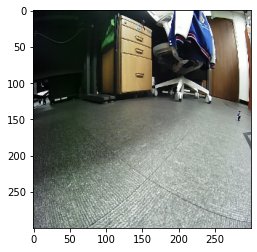

In [4]:
plt.imshow(image)

In [5]:
def representative_data_gen():
    data_dir = Path("data/object_detection/train")
    data = []
    for data_path in list(data_dir.glob("*.JPEG"))[:20]:
        image = cv2.imread(str(data_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (300, 300))
        image = image / 255
        data.append(image)
    data = tf.cast(np.asarray(data), dtype=tf.float32)
    yield [data]


In [13]:
model_dir = Path("objects_on_road_processor/model/ssd_mobilenet_v2_quantized/")

# saved_model_dir = model_dir / "saved_model"
# converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(str(saved_model_dir))


ssd_graph_dir = model_dir / "tflite_ssd_graph"
input_arrays = ["normalized_input_image_tensor"]
output_arrays = [
    "TFLite_Detection_PostProcess",
    "TFLite_Detection_PostProcess:1",
    "TFLite_Detection_PostProcess:2",
    "TFLite_Detection_PostProcess:3",
]
converter = tf.compat.v1.lite.TFLiteConverter.from_frozen_graph(
    str(ssd_graph_dir / "tflite_graph.pb"),
    input_arrays,
    output_arrays,
    input_shapes={"normalized_input_image_tensor": [1, 300, 300, 3]},
)

converter.optimizations = [
    tf.compat.v1.lite.Optimize.DEFAULT,
]

converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
converter.allow_custom_ops = True

tflite_model = converter.convert()

with open(model_dir / "tflite/converted_model2.tflite", "wb") as f:
    f.write(tflite_model)


2022-11-07 20:35:01.521290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:01.522515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:01.523435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:01.524148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:01.524614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.


INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: inputs


INFO:tensorflow:Tensor's key in saved_model's tensor_map: inputs


INFO:tensorflow: tensor name: image_tensor:0, shape: (-1, -1, -1, 3), type: DT_UINT8


INFO:tensorflow: tensor name: image_tensor:0, shape: (-1, -1, -1, 3), type: DT_UINT8


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_multiclass_scores


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_multiclass_scores


INFO:tensorflow: tensor name: detection_multiclass_scores:0, shape: (-1, 100, 2), type: DT_FLOAT


INFO:tensorflow: tensor name: detection_multiclass_scores:0, shape: (-1, 100, 2), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: num_detections


INFO:tensorflow:Tensor's key in saved_model's tensor_map: num_detections


INFO:tensorflow: tensor name: num_detections:0, shape: (-1), type: DT_FLOAT


INFO:tensorflow: tensor name: num_detections:0, shape: (-1), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_scores


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_scores


INFO:tensorflow: tensor name: detection_scores:0, shape: (-1, 100), type: DT_FLOAT


INFO:tensorflow: tensor name: detection_scores:0, shape: (-1, 100), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_classes


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_classes


INFO:tensorflow: tensor name: detection_classes:0, shape: (-1, 100), type: DT_FLOAT


INFO:tensorflow: tensor name: detection_classes:0, shape: (-1, 100), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_boxes


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_boxes


INFO:tensorflow: tensor name: detection_boxes:0, shape: (-1, 100, 4), type: DT_FLOAT


INFO:tensorflow: tensor name: detection_boxes:0, shape: (-1, 100, 4), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: raw_detection_boxes


INFO:tensorflow:Tensor's key in saved_model's tensor_map: raw_detection_boxes


INFO:tensorflow: tensor name: raw_detection_boxes:0, shape: (-1, -1, 4), type: DT_FLOAT


INFO:tensorflow: tensor name: raw_detection_boxes:0, shape: (-1, -1, 4), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: raw_detection_scores


INFO:tensorflow:Tensor's key in saved_model's tensor_map: raw_detection_scores


INFO:tensorflow: tensor name: raw_detection_scores:0, shape: (-1, -1, 2), type: DT_FLOAT


INFO:tensorflow: tensor name: raw_detection_scores:0, shape: (-1, -1, 2), type: DT_FLOAT
2022-11-07 20:35:02.531138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:02.533833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:02.535200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:02.536130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:02.536668: I t

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.


INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.
2022-11-07 20:35:04.025490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:04.026097: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-07 20:35:04.026334: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-11-07 20:35:04.028568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:04.029402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.


INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: inputs


INFO:tensorflow:Tensor's key in saved_model's tensor_map: inputs


INFO:tensorflow: tensor name: image_tensor:0, shape: (-1, -1, -1, 3), type: DT_UINT8


INFO:tensorflow: tensor name: image_tensor:0, shape: (-1, -1, -1, 3), type: DT_UINT8


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: num_detections


INFO:tensorflow:Tensor's key in saved_model's tensor_map: num_detections


INFO:tensorflow: tensor name: num_detections:0, shape: (-1), type: DT_FLOAT


INFO:tensorflow: tensor name: num_detections:0, shape: (-1), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_boxes


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_boxes


INFO:tensorflow: tensor name: detection_boxes:0, shape: (-1, 100, 4), type: DT_FLOAT


INFO:tensorflow: tensor name: detection_boxes:0, shape: (-1, 100, 4), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: raw_detection_boxes


INFO:tensorflow:Tensor's key in saved_model's tensor_map: raw_detection_boxes


INFO:tensorflow: tensor name: raw_detection_boxes:0, shape: (-1, -1, 4), type: DT_FLOAT


INFO:tensorflow: tensor name: raw_detection_boxes:0, shape: (-1, -1, 4), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_classes


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_classes


INFO:tensorflow: tensor name: detection_classes:0, shape: (-1, 100), type: DT_FLOAT


INFO:tensorflow: tensor name: detection_classes:0, shape: (-1, 100), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_scores


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_scores


INFO:tensorflow: tensor name: detection_scores:0, shape: (-1, 100), type: DT_FLOAT


INFO:tensorflow: tensor name: detection_scores:0, shape: (-1, 100), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: raw_detection_scores


INFO:tensorflow:Tensor's key in saved_model's tensor_map: raw_detection_scores


INFO:tensorflow: tensor name: raw_detection_scores:0, shape: (-1, -1, 2), type: DT_FLOAT


INFO:tensorflow: tensor name: raw_detection_scores:0, shape: (-1, -1, 2), type: DT_FLOAT


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_multiclass_scores


INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_multiclass_scores


INFO:tensorflow: tensor name: detection_multiclass_scores:0, shape: (-1, 100, 2), type: DT_FLOAT


INFO:tensorflow: tensor name: detection_multiclass_scores:0, shape: (-1, 100, 2), type: DT_FLOAT
2022-11-07 20:35:06.080176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:06.080695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:06.080987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:06.081375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:06.081

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.


INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.
2022-11-07 20:35:08.294313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:08.295037: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-07 20:35:08.295453: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-11-07 20:35:08.296107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:35:08.296545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2

RuntimeError: Failed to initialize op resolver for calibration:
There are unresolved custom ops: [TensorArrayWriteV3, TensorArrayGatherV3, TensorArraySizeV3, TensorArrayReadV3, TensorArrayScatterV3, TensorArrayV3]Encountered unresolved custom op: TensorArrayV3.
See instructions: https://www.tensorflow.org/lite/guide/ops_custom Node number 149 (TensorArrayV3) failed to prepare.